## EFC-Package

In [1]:
from math import ceil
from pprint import pprint

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import auc, classification_report, confusion_matrix, f1_score, roc_curve

In [3]:
from efc import EnergyBasedFlowClassifier

In [4]:
from research_aml_elliptic.src.reaml.model_performance import calculate_model_score
from research_aml_elliptic.src.experiments.general_functions.elliptic_data_preprocessing import run_elliptic_preprocessing_pipeline

Root directory:  /Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic


In [5]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

In [6]:
from matplotlib import pyplot as plt

In [7]:
# Import Elliptic data set and set variables
last_time_step = 49
last_train_time_step = 34
only_labeled = True

### Unsupervised Elliptic Data Set With EFC

In [8]:
# '1': 1, -> class1 (illicit)
# '2': 0, -> class2 (licit)
# 'unknown': 2 -> dropped
X_train, X_test, y_train, y_test = run_elliptic_preprocessing_pipeline(last_train_time_step=last_train_time_step,
                                                                             last_time_step=last_time_step,
                                                                             only_labeled=only_labeled)

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [15]:
X_test.drop(['time_step'], axis=1)

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
29894,-0.172982,-0.055242,-1.201369,-0.121970,-0.024025,-0.113002,-0.061584,-0.163642,-0.169456,-0.049707,...,-0.577099,-0.626229,0.241128,0.241406,-0.216057,-0.125939,-0.131155,-0.269818,-0.120613,-0.119792
29895,-0.166832,-0.115508,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157351,-0.163254,-0.049707,...,-0.532262,-0.575769,-0.979074,-0.978556,0.018279,-0.049041,-0.038193,-0.011377,-1.760926,-1.760984
29896,-0.167233,-0.115086,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157761,-0.163658,-0.049707,...,1.283665,0.956938,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
29897,-0.172509,-0.120473,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,-0.163159,-0.168980,-0.049707,...,-0.502370,-0.550539,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
29898,-0.172805,-0.112290,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163461,-0.169278,-0.049707,...,-0.577099,0.004515,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46559,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,-0.155646,-0.049707,...,1.793987,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035
46560,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,-0.169437,-0.049707,...,-0.577099,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792
46561,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,-0.167106,-0.032993,...,1.709623,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
46562,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.082559,-0.089510,-0.049707,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792


In [16]:
X_train.drop(['time_step'], axis=1)

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,0.020069,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
2,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,...,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
4,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,-0.047227,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29889,-0.172968,-0.071395,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.163627,-0.169442,-0.049707,...,0.170195,1.266002,1.461330,1.461369,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
29890,-0.172924,-0.107411,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163583,-0.169398,-0.049707,...,-0.577099,0.534340,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
29891,-0.172897,-0.070152,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.163555,-0.169371,-0.049707,...,-0.039047,-0.146863,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
29892,-0.155367,-0.081852,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.145619,-0.151686,-0.049707,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792


In [19]:
clf = EnergyBasedFlowClassifier(n_bins=30, cutoff_quantile=0.9)

In [20]:
clf.fit(X_train, y_train, base_class=0)

EnergyBasedFlowClassifier(cutoff_quantile=0.9)

In [21]:
y_pred, y_energies = clf.predict(X_test, return_energies=True)

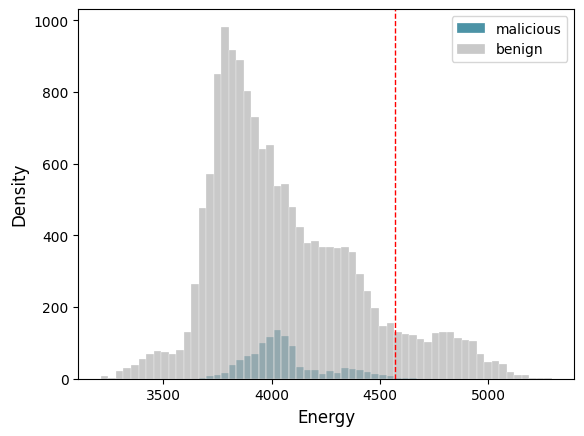

In [22]:
# ploting energies
benign = np.where(y_test == 0)[0]
malicious = np.where(y_test == 1)[0]

benign_energies = y_energies[benign]
malicious_energies = y_energies[malicious]
cutoff = clf.estimators_[0].cutoff_

bins = np.histogram(y_energies, bins=60)[1]

plt.hist(
    malicious_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.4524465809250683


In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14047  1540]
 [ 1079     4]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     15587
           1       0.00      0.00      0.00      1083

    accuracy                           0.84     16670
   macro avg       0.47      0.45      0.46     16670
weighted avg       0.87      0.84      0.86     16670



In [ ]:
f1 = f1_score(y_true=y_test,y_pred=y_pred)
f1

### Including No Labeled Data

In [25]:
# Import Elliptic data set and set variables
last_time_step = 49
last_train_time_step = 34
only_labeled = False

In [26]:
# '1': 1, -> class1 (illicit)
# '2': 0, -> class2 (licit)
# 'unknown': 2 -> dropped
X_train, X_test, y_train, y_test = run_elliptic_preprocessing_pipeline(last_train_time_step=last_train_time_step,
                                                                             last_time_step=last_time_step,
                                                                             only_labeled=only_labeled)

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/research_aml_elliptic/src/experiments/general_functions/elliptic_data_preprocessing.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)


In [27]:
X_test.drop(['time_step'], axis=1)

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
136265,-0.159837,-0.030732,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.150191,-0.156195,-0.049707,...,0.207560,0.048667,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
136266,-0.165893,-0.029572,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156388,-0.162304,-0.049707,...,0.304708,0.181123,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
136267,-0.129693,0.070098,1.573595,-0.121970,0.075226,-0.113002,-0.061584,-0.119348,-0.125783,-0.049707,...,-0.543471,-0.514272,-0.463356,-0.462939,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
136268,-0.111789,1.294910,1.573595,0.553368,-0.043875,0.641758,-0.061584,-0.159732,-0.158279,-0.020601,...,-0.547208,-0.537925,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
136269,-0.172796,-0.081127,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.163571,-0.169343,-0.049303,...,-0.494897,-0.544232,-0.979074,-0.978556,0.018279,0.854508,2.146417,2.013077,-1.760926,-1.760984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,-0.142008,-0.049707,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203765,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,-0.162334,-0.049707,...,0.162722,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
203766,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,-0.168778,-0.045389,...,1.261246,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203767,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,-0.169317,-0.049707,...,-0.397749,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399


In [28]:
X_train.drop(['time_step'], axis=1)

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136260,-0.170284,0.043535,0.463609,0.178180,-0.063725,0.222447,-0.061584,-0.163645,-0.168382,-0.043072,...,-0.577099,-0.247782,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
136261,-0.172671,-0.140352,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.163325,-0.169144,-0.049707,...,-0.479951,-0.493772,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
136262,-0.168139,-0.101323,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.158687,-0.164571,-0.049707,...,-0.293127,-0.361316,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
136263,-0.172968,-0.081852,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.163628,-0.169442,-0.049707,...,-0.278181,0.887556,1.461330,1.461369,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792


In [29]:
clf = EnergyBasedFlowClassifier(n_bins=30, cutoff_quantile=0.9)

In [30]:
clf.fit(X_train, y_train, base_class=0)

EnergyBasedFlowClassifier(cutoff_quantile=0.9)

In [31]:
y_pred, y_energies = clf.predict(X_test, return_energies=True)

In [36]:
y_test

136265    2
136266    2
136267    2
136268    2
136269    2
         ..
203764    2
203765    2
203766    1
203767    2
203768    2
Name: class, Length: 67504, dtype: int64

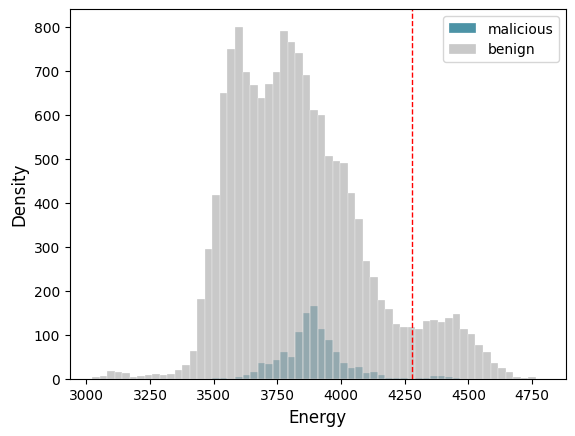

In [33]:
# ploting energies
benign = np.where(y_test == 0)[0]
malicious = np.where(y_test == 1)[0]

benign_energies = y_energies[benign]
malicious_energies = y_energies[malicious]
cutoff = clf.estimators_[0].cutoff_

bins = np.histogram(y_energies, bins=60)[1]

plt.hist(
    malicious_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

In [37]:
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

ValueError: multiclass format is not supported

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15559     0    28]
 [ 1055    28     0]
 [48866     1  1967]]
              precision    recall  f1-score   support

           0       0.24      1.00      0.38     15587
           1       0.97      0.03      0.05      1083
           2       0.99      0.04      0.07     50834

    accuracy                           0.26     67504
   macro avg       0.73      0.35      0.17     67504
weighted avg       0.81      0.26      0.15     67504



In [39]:
f1 = f1_score(y_true=y_test,y_pred=y_pred)
f1

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
# '1': 1, -> class1 (illicit)
# '2': 0, -> class2 (licit)
# 'unknown': 2 -> dropped
X_train_1, X_test_1, y_train_1, y_test_1 = run_elliptic_preprocessing_pipeline(last_train_time_step=last_train_time_step,
                                                                             last_time_step=last_time_step,
                                                                             only_labeled=only_labeled)

In [ ]:
X_test.drop(['time_step'], axis=1)
X_train.drop(['time_step'], axis=1)

In [ ]:
idx_abnormal = np.where(y_train_1 == 1)[0]  # find abnormal samples indexes in the training set
X_train_1.drop(idx_abnormal, axis=0, inplace=True)  # remove abnormal samples from training (EFC trains with only benign instances)
y_train_1.drop(idx_abnormal, axis=0, inplace=True)  # remove the corresponding abonrmal training targets

In [ ]:
X_train_1

In [ ]:
y_train_1

In [ ]:
clf = EnergyBasedFlowClassifier(n_bins=10, cutoff_quantile=0.8)

In [ ]:
clf.fit(X_train_1, y_train_1, base_class=0)

In [ ]:
y_pred_1, y_energies_1 = clf.predict(X_test_1, return_energies=True)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [ ]:
print(confusion_matrix(y_test_1, y_pred_1))
print(classification_report(y_test_1, y_pred_1))

In [ ]:
y_pred_1